In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## loading the datasets

In [2]:
data = pd.read_excel("data0708.xlsx")
data.head()

,year,month,client_number,amount of kWh,sum (NIS)
0,2019,1,100022,89206.0,48216.20
1,2019,1,100646,20042.0,8304.55
2,2019,1,100652,140926.0,73190.45
3,2019,1,100994,278775.0,150590.02
4,2019,1,120047,219299.0,113442.55


In [3]:
data_classification = pd.read_excel("customer classification.xlsx")
data_classification.head()

,client_number,type
0,130002,Private
1,130003,Private
2,130005,Private
3,130006,Private
4,130007,Private


## Checking the dataset informations

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           42350 non-null  int64  
 1   month          42350 non-null  int64  
 2   client_number  42350 non-null  object 
 3   amount of kWh  42350 non-null  float64
 4   sum (NIS)      42350 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ MB


In [5]:
data_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_number  1433 non-null   object
 1   type           1433 non-null   object
dtypes: object(2)
memory usage: 22.5+ KB


## Checking for missing values

In [6]:
data.isnull().sum()

year             0
month            0
client_number    0
amount of kWh    0
sum (NIS)        0
dtype: int64

In [7]:
data_classification.isnull().sum()

client_number    0
type             0
dtype: int64

### New classified data

In [8]:
new_classified = pd.read_excel("customer classification_left.xlsx")
new_classified.head()

,client_number,type
0,100994,Large business
1,101046,Large business
2,195000,Small business
3,195008,Large business
4,195010,Large business


In [9]:
new_classified.isnull().sum()

client_number    0
type             0
dtype: int64

In [10]:
classified = pd.concat([data_classification, new_classified], axis=0)
classified.head()

,client_number,type
0,130002,Private
1,130003,Private
2,130005,Private
3,130006,Private
4,130007,Private


## Merging the datasets

In [11]:
merged_data = pd.merge(data, data_classification, on='client_number', how='left')
merged_data.head()

,year,month,client_number,amount of kWh,sum (NIS),type
0,2019,1,100022,89206.0,48216.20,Large business
1,2019,1,100646,20042.0,8304.55,Large business
2,2019,1,100652,140926.0,73190.45,Large business
3,2019,1,100994,278775.0,150590.02,NaN
4,2019,1,120047,219299.0,113442.55,Large business


In [12]:
len(merged_data)

42350

In [13]:
not_classified_client_numbers = merged_data[merged_data['type'].isna()]
not_classified_client_numbers.head()

,year,month,client_number,amount of kWh,sum (NIS),type
3,2019,1,100994,278775.0,150590.02,NaN
541,2019,2,100994,229979.0,122292.64,NaN
1081,2019,3,100994,233080.0,94227.26,NaN
1627,2019,4,100994,165902.0,66099.77,NaN
2174,2019,5,100994,172336.0,70054.56,NaN


In [14]:
not_classified_client_numbers.to_csv("not_classified_customers.csv", index=False)

In [15]:
classified_client_numbers = merged_data[merged_data['type'].notna()]
classified_client_numbers.head()

,year,month,client_number,amount of kWh,sum (NIS),type
0,2019,1,100022,89206.00,48216.20,Large business
1,2019,1,100646,20042.00,8304.55,Large business
2,2019,1,100652,140926.00,73190.45,Large business
4,2019,1,120047,219299.00,113442.55,Large business
5,2019,1,130002,433.93,204.64,Private


## Setting the new season feature

In [16]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

In [17]:
classified_client_numbers['season'] = classified_client_numbers['month'].apply(get_season)
classified_client_numbers.head()

,year,month,client_number,amount of kWh,sum (NIS),type,season
0,2019,1,100022,89206.00,48216.20,Large business,Winter
1,2019,1,100646,20042.00,8304.55,Large business,Winter
2,2019,1,100652,140926.00,73190.45,Large business,Winter
4,2019,1,120047,219299.00,113442.55,Large business,Winter
5,2019,1,130002,433.93,204.64,Private,Winter


## Exploratory data analysis

In [18]:
import seaborn as sns

### Line plot for amount of kWh over the years


The function make_trend_plots(t) is designed to visualize the trends of energy consumption and financial data over a series of years for a specific client type. The function takes as input a client type t and generates a line plot to compare the total amount of energy consumed (in kWh) and the total financial sum (in NIS) across the years.

Results:

This line plot visualizes how energy consumption and the associated financial expenditure have changed over the years for the specified client type. 

In [19]:

def make_trend_plots(t):

    classified_ = classified_client_numbers[classified_client_numbers["type"] == t]
    yearly_data = classified_.groupby('year')[["sum (NIS)","amount of kWh"]].sum().reset_index()


    #display(yearly_data)
    plt.figure(figsize=(15, 6))


    plt.plot(list(yearly_data.year), list(yearly_data["amount of kWh"]), marker='o', label="sum of KWH")
    plt.plot(list(yearly_data.year), list(yearly_data["sum (NIS)"]), marker='o', label="sum of NIS")
    plt.title('Trend of Amount of kWh and NIS Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Amount of kWh and sum NIS')
    plt.legend()

    plt.show()

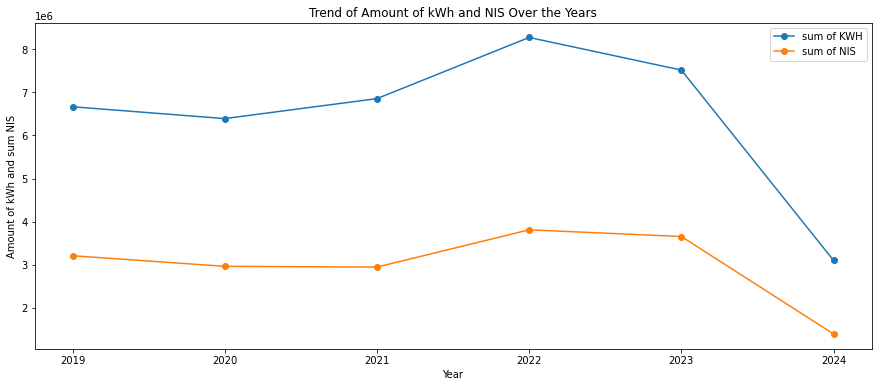

In [20]:
make_trend_plots("Large business")

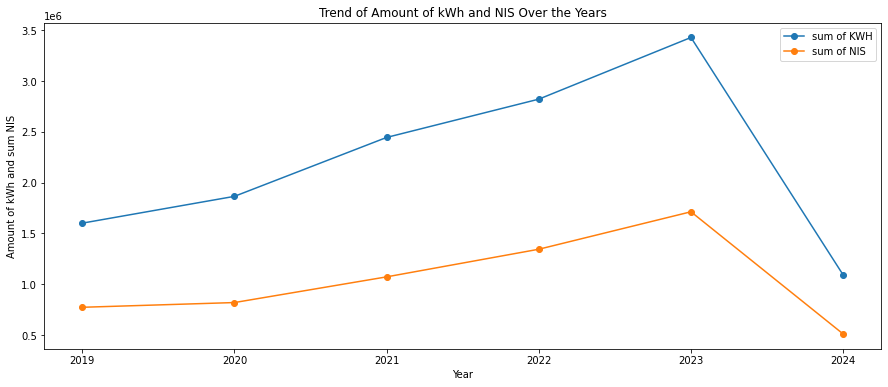

In [21]:
make_trend_plots("Small business")

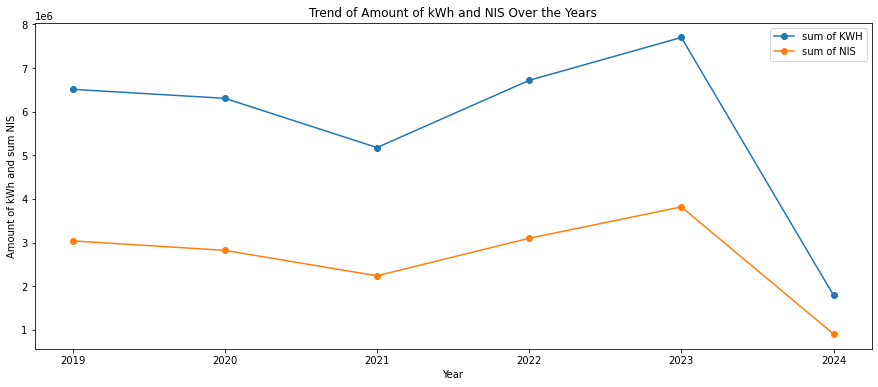

In [22]:
make_trend_plots("Private")

### Scatterplot of 'amount of kWh' vs 'sum (NIS)'

This follwoign code creates a scatter plot to explore the relationship between the amount of energy consumed (in kWh) and the financial sum (in NIS) across different client types. By coloring the data points according to client type, the plot visually distinguishes how these two variables are related within each category.

This visualization helps in identifying patterns, clusters, or outliers, and understanding how consumption and cost vary across different client categories.


From the visualizations we can see there are some private clients who uses lots of kWh more then 300000 we need to check if either these classified customers are really private or they are large bussiness

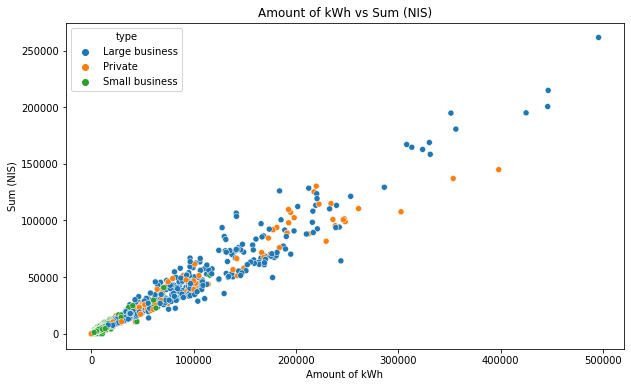

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount of kWh', y='sum (NIS)', hue='type', data=classified_client_numbers)
plt.title('Amount of kWh vs Sum (NIS)')
plt.xlabel('Amount of kWh')
plt.ylabel('Sum (NIS)')
plt.show()

### Boxplot of 'sum (NIS)' by 'type' and 'season'

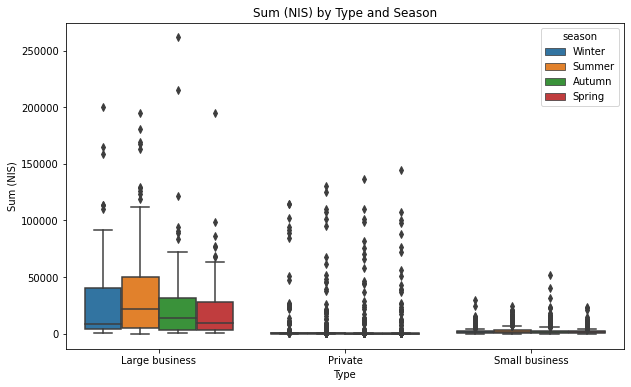

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='sum (NIS)', hue='season', data=classified_client_numbers)
plt.title('Sum (NIS) by Type and Season')
plt.xlabel('Type')
plt.ylabel('Sum (NIS)')
plt.show()

In [25]:
def remove_outliers(df, column):
    grouped = df.groupby('type')
    

    cleaned_data = []

    for season, group in grouped:
        
        #display(group)
        q1 = group[column].quantile(0.25)
        q3 = group[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        cleaned_group = group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]
        cleaned_data.append(cleaned_group)

    return pd.concat(cleaned_data)


df_cleaned_kwh = remove_outliers(classified_client_numbers, 'amount of kWh')
df_cleaned_nis = remove_outliers(df_cleaned_kwh, 'sum (NIS)')

df_cleaned_nis.head()

,year,month,client_number,amount of kWh,sum (NIS),type,season
0,2019,1,100022,89206.00,48216.20,Large business,Winter
1,2019,1,100646,20042.00,8304.55,Large business,Winter
2,2019,1,100652,140926.00,73190.45,Large business,Winter
86,2022,7,130124,21085.04,10472.38,Large business,Summer
151,2019,1,130411,6494.08,3202.88,Large business,Winter


In [26]:
### After removel of the outliers from the data

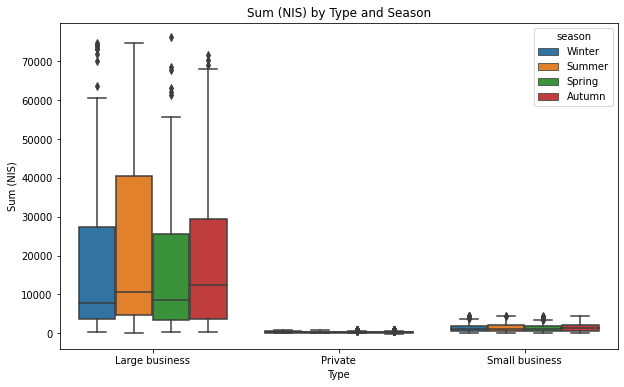

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='sum (NIS)', hue='season', data=df_cleaned_nis)
plt.title('Sum (NIS) by Type and Season')
plt.xlabel('Type')
plt.ylabel('Sum (NIS)')
plt.show()

### Explainations:

- From the above plots you can see there are large similar values for large bussiness clients specifically in summer you can see it in yellow the large bussiness clients have higher range of sum(NIS) values. 

- For private type clients overall range you can also see they have small range with line at bottom shows small values of Sum (NIS). We also observe some very high NIS values for private client type as well. 

- For small bussiness the sum values are slightly higher then private clients. 

### Pie chart for 'type' distribution

The following pie chart is used to display the distribution of different client types within the classified_client_numbers dataset. The pie chart provides a visual representation of how each client type contributes to the overall dataset, making it easy to see the proportion of each type.

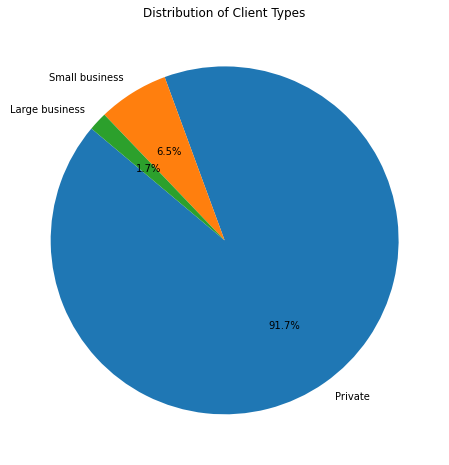

In [28]:
type_counts = df_cleaned_nis['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Client Types')
plt.show()

### Count plot for 'season'

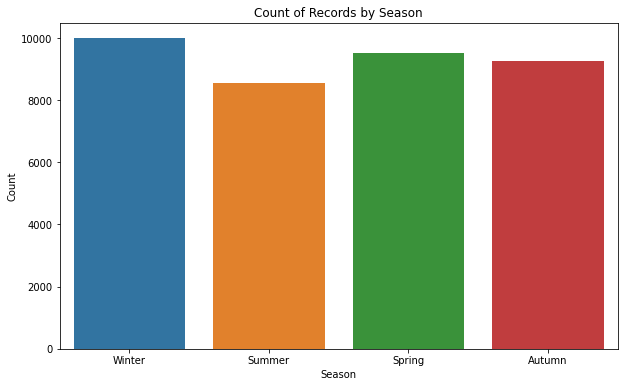

In [29]:

plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df_cleaned_nis)
plt.title('Count of Records by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

### Select Customer Type


The make_plots(cust_type) function is designed to generate two complementary visualizations for a specific client type within the classified_client_numbers dataset. The function provides insights into the time series trends of energy consumption and financial sums, as well as the distribution of energy consumption for the selected client type.


- The first plot (left side) will show how energy consumption and financial sums have changed over time for the specified client type, allowing for an understanding of temporal trends.
- The second plot (right side) will display a histogram of the distribution of energy consumption, providing insights into how energy usage varies within this client type.

You can select these three customers and visualize there individual plots as well

```{'Large business', 'Private', 'Small business'}```

In [30]:
df_cleaned_nis['date'] = pd.to_datetime(df_cleaned_nis['year'].astype(str) + '-' + df_cleaned_nis['month'].astype(str) + '-01')

In [39]:
df_cleaned_nis.columns

Index(['year', 'month', 'client_number', 'amount of kWh', 'sum (NIS)', 'type',
       'season', 'date'],
      dtype='object')

In [32]:
def make_plots(cust_type):
    selected = df_cleaned_nis[df_cleaned_nis["type"]==cust_type]
    
    selected = selected.sort_values(by="date")
    
    fig ,ax = plt.subplots(1,2, figsize=(15,6))
    
    ax[0].plot(list(selected["date"]), list(selected["amount of kWh"]), label="amount of kWh")
    ax[0].plot(list(selected["date"]), list(selected["sum (NIS)"]), label="sum (NIS)")
    
    
    ax[0].set_xlabel("Date")
    ax[0].set_ylabel("amount kWh sum NIS")
    ax[0].legend()
    #ax[0,1].show()
    
    
    ax[1].hist(list(selected['amount of kWh']), bins=30)
    ax[1].set_title('Distribution of kWh Consumption')
    ax[1].set_xlabel('Amount of kWh')
    ax[1].set_ylabel('Frequency')
    
    plt.show()
    

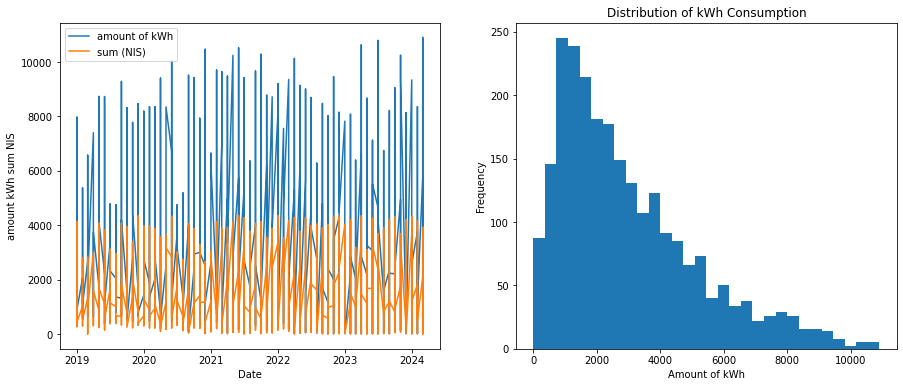

In [33]:
customer_type = "Small business"

make_plots(customer_type)

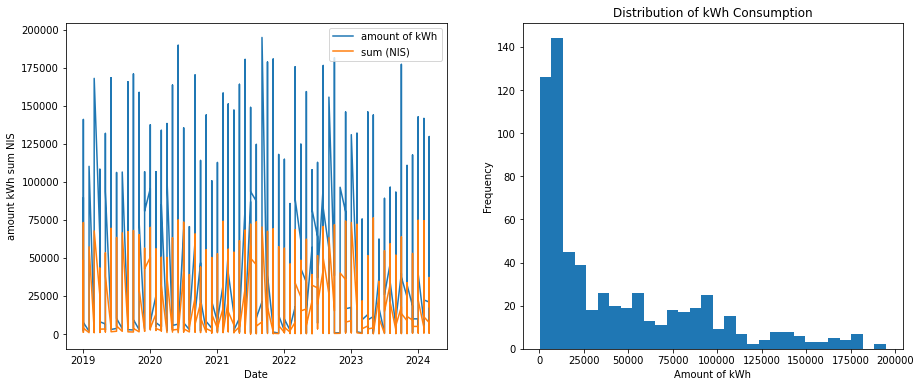

In [34]:
customer_type = "Large business"

make_plots(customer_type)

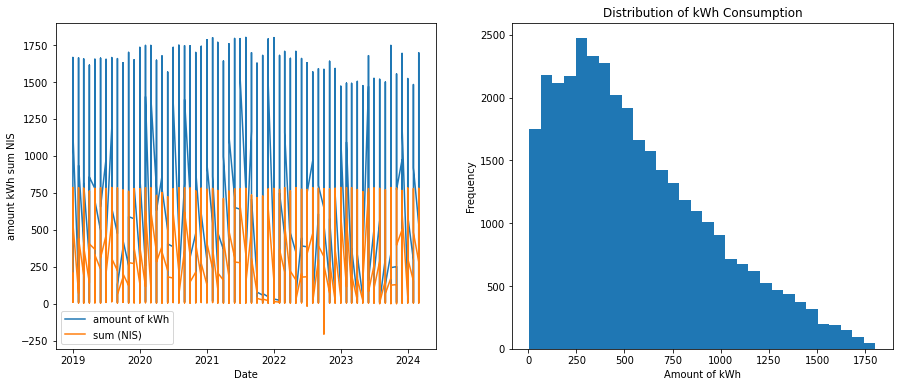

In [35]:
customer_type = "Private"

make_plots(customer_type)

### Seasonal Trend by client number

In [40]:
def make_client_plots(client_number):
    selected = df_cleaned_nis[df_cleaned_nis["client_number"]==client_number]
    
    selected = selected.sort_values(by="date")
    
    print(f"The selected client type is : {list(selected.type)[0]}")
    
    fig ,ax = plt.subplots(1,2, figsize=(15,6))
    
    ax[0].plot(list(selected["date"]), list(selected["amount of kWh"]), label="amount of kWh")
    ax[0].plot(list(selected["date"]), list(selected["sum (NIS)"]), label="sum (NIS)")
    
    
    ax[0].set_xlabel("Date")
    ax[0].set_ylabel("amount kWh sum NIS")
    ax[0].legend()
    ax[0].tick_params(axis='x', rotation=45)
    #ax[0,1].show()
    
    
    ax[1].hist(list(selected['amount of kWh']), bins=30)
    ax[1].set_title('Distribution of kWh Consumption')
    ax[1].set_xlabel('Amount of kWh')
    ax[1].set_ylabel('Frequency')
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.show()

### Select any client number

You can select any client number to see its yearly trend

In [41]:
client = list(set(df_cleaned_nis["client_number"]))[3]

The selected client type is : Private


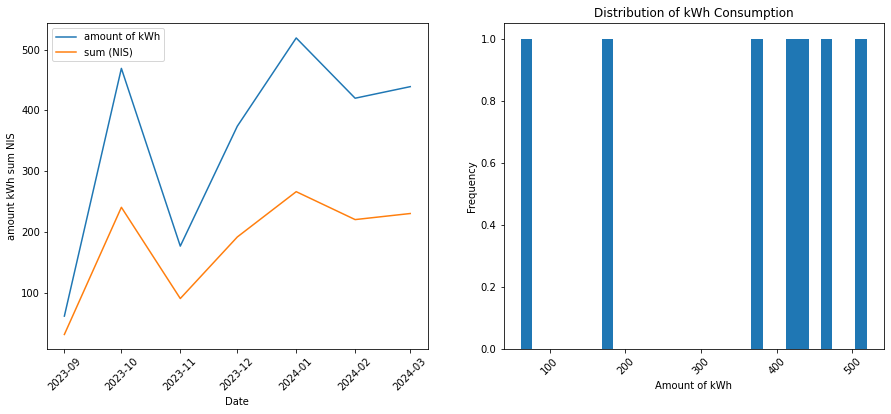

In [42]:
make_client_plots(client)

### Explainations:

So from the above plots you can see it displays the trend lines for specific client. What is the sum of kWh and sum of Nis over the year for the selected client. 

## Splitting the data and Training the model



#### Before Training the model
- we need to convert the month and year into proper date format type data
- also we need to convert the textual data feature like type and season into there numeric terms as well


### Forecast using STL model
The make_predictions(name) function is designed to perform time series analysis and forecasting for energy consumption or financial sums for different client types within the classified_client_numbers dataset. The function uses Seasonal-Trend decomposition using LOESS (STL) to analyze the time series components and Holt-Winters Exponential Smoothing for forecasting future values.

In [43]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
from sklearn.preprocessing import LabelEncoder

le_type = LabelEncoder()
le_season = LabelEncoder()
df_cleaned_nis['type_encoded'] = le_type.fit_transform(df_cleaned_nis['type'])
df_cleaned_nis['season_encoded'] = le_season.fit_transform(df_cleaned_nis['season'])

numeric_cols = classified_client_numbers.select_dtypes(include='number').columns

In [81]:
df_cleaned_nis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37345 entries, 2019-01-01 to 2024-03-01
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            37345 non-null  int64  
 1   month           37345 non-null  int64  
 2   client_number   37345 non-null  object 
 3   amount of kWh   37345 non-null  float64
 4   sum (NIS)       37345 non-null  float64
 5   type            37345 non-null  object 
 6   season          37345 non-null  object 
 7   type_encoded    37345 non-null  int64  
 8   season_encoded  37345 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 2.8+ MB


### Metrics functions for evaluations

In [45]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

def calculate_rmspe(y_true, y_pred):
    errors = []
    for actual, predicted in zip(y_true, y_pred):
        if actual != 0:
            error = ((actual - predicted) / actual) ** 2
            errors.append(error)
        else:
            errors.append(float('nan'))

    mean_error = sum(errors) / len(errors)
    rmspe = (mean_error ** 0.5)
    
    return rmspe

In [123]:
def calculate_ape(y_true, y_pred):
    ape_values = []
    for actual, predicted in zip(y_true, y_pred):
        if actual != 0:
            ape = abs((actual - predicted) / actual)
            ape_values.append(ape)
        else:
            print(f"Encountered zero actual value at index {len(ape_values)}")
            ape_values.append(float('nan'))  
    return ape_values

In [144]:
import numpy as np
warnings.filterwarnings("ignore")

#df_cleaned_nis.set_index('date', inplace=True)

def make_predicitons(name):

    for t in set(df_cleaned_nis["type"]):
        selected = df_cleaned_nis[df_cleaned_nis["type"]==t][numeric_cols]
        #display(selected)
        print(f"The total lenght of {t} data is {len(selected)}")
        
        selected= selected.resample('MS').mean()
        
        """ #making split point with 70% of the training data.
        split_point = int(len(selected[name]) * 0.7)

        #split data into train and test lists
        train_data = selected[name][:split_point]
        test_data = selected[name][split_point:]"""
        
        
        ## Training the STL model with train data
        stl = STL(selected[name], seasonal=13)
        result = stl.fit()
        model = ExponentialSmoothing(selected[name], trend='add', seasonal='add', seasonal_periods=12)


        fit = model.fit(optimized=True, remove_bias=False)
        
        forecast_full = fit.fittedvalues
        
        #print(len(forecast_full))
        forecast_future = fit.forecast(steps=24)  


        mape = mean_absolute_percentage_error(selected[name], forecast_full)
        rmspe = calculate_rmspe(selected[name], forecast_full)
        ape = calculate_ape(selected[name], forecast_full)
        
        ape = sum(ape)/len(ape)

        print(f"Client Type: {t}")
        print(f"APE: {ape:.2f}")
        print(f"MAPE: {mape:.2f}")
        print(f"RMSPE: {rmspe:.2f}")
        
            
        # Plot the results
        plt.figure(figsize=(14, 7))
        plt.plot(selected[name], label='Actual')
        plt.plot(result.trend, label='Trend')
        plt.plot(result.seasonal, label='Seasonal')
        plt.plot(forecast_full, label='Forecast comparison', linestyle='--')
        plt.plot(forecast_future, label='Forecast-Future', linestyle='--', color="green")
        


        plt.title(f'STL Decomposition and Forecast for {t}')
        plt.xlabel('Date')
        plt.ylabel(f'{name}')
        plt.legend()
        plt.show()

## Making predictions for amount of kwh values

The total lenght of Large business data is 649
Client Type: Large business
APE: 0.22
MAPE: 0.22
RMSPE: 0.31


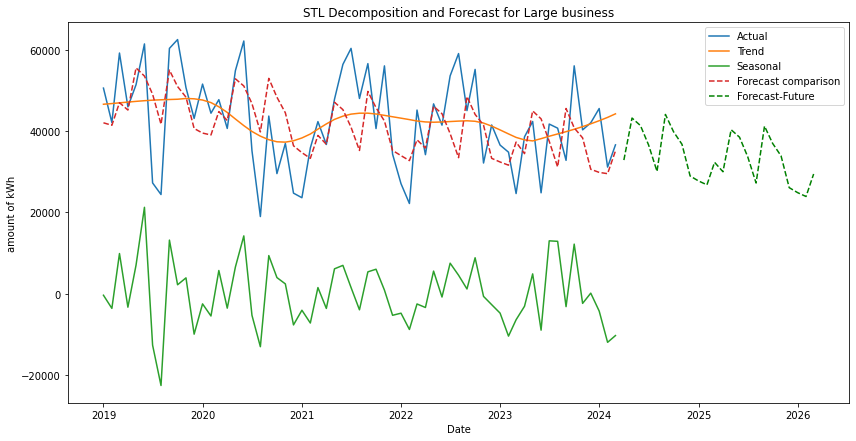

The total lenght of Small business data is 2445
Client Type: Small business
APE: 0.07
MAPE: 0.07
RMSPE: 0.10


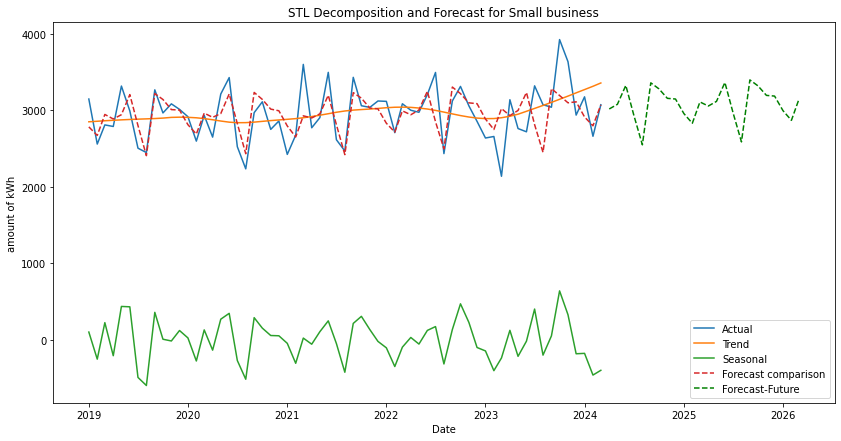

The total lenght of Private data is 34251
Client Type: Private
APE: 0.07
MAPE: 0.07
RMSPE: 0.09


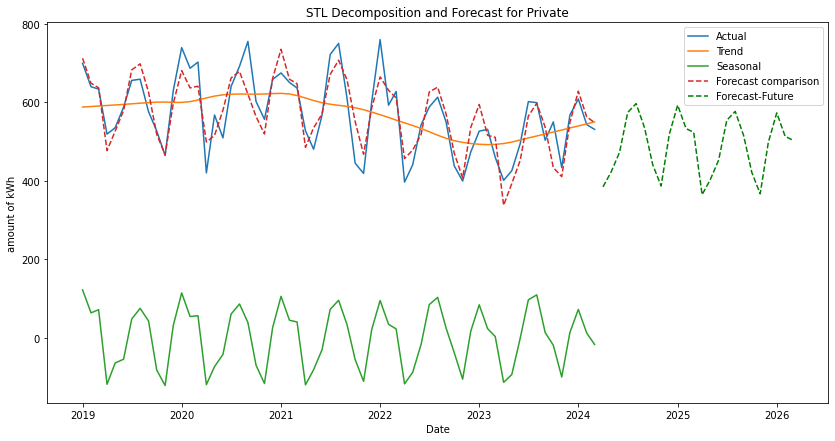

In [145]:
make_predicitons('amount of kWh')

## Making predictions for sum of NIS values

The total lenght of Large business data is 649
Client Type: Large business
APE: 0.21
MAPE: 0.21
RMSPE: 0.28


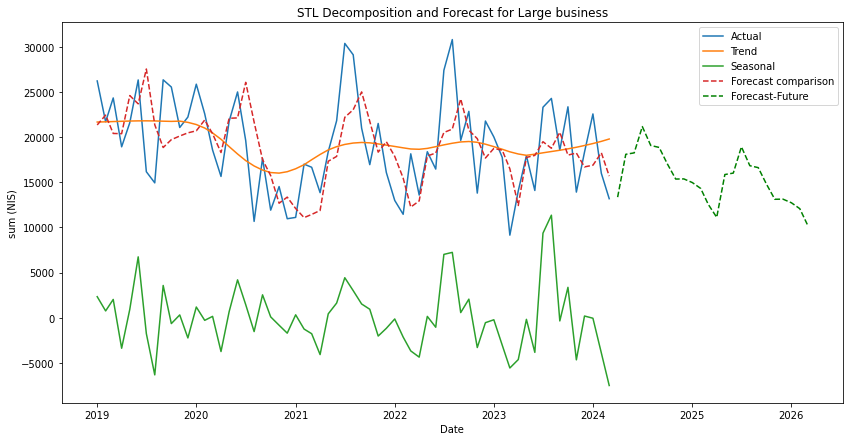

The total lenght of Small business data is 2445
Client Type: Small business
APE: 0.08
MAPE: 0.08
RMSPE: 0.10


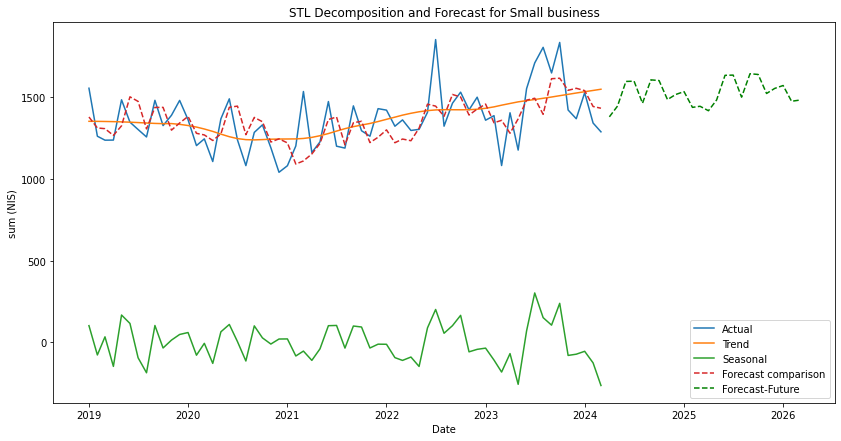

The total lenght of Private data is 34251
Client Type: Private
APE: 0.06
MAPE: 0.06
RMSPE: 0.08


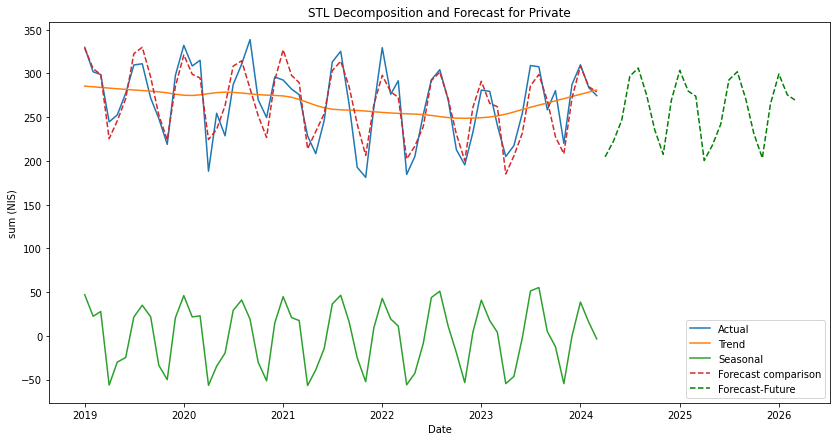

In [146]:
make_predicitons('sum (NIS)')

In [147]:
df_cleaned_nis.to_csv("final_cleaned_data.csv", index=False)